## EDA

In [48]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
connection = sqlite3.connect('airbnb.db')

In [97]:
airbnbDF = pd.read_sql_query("SELECT * FROM airbnb_view", connection)

In [98]:
airbnbDF

,listing_id,MAX(date),available,price,adjusted_price,minimum_nights,maximum_nights,source_name,id,MAX(last_scraped),...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3571,2023-09-13,t,$200.00,$200.00,90,730,calendar_9_2022,3571,2022-09-14,...,4.83,4.83,4.67,,f,1,1,0,0,0.06
1,3686,2024-03-17,t,$67.00,$67.00,31,365,calendar_3_2023,3686,2023-03-19,...,4.83,3.86,4.62,,f,1,0,1,0,0.54
2,3943,2024-03-17,t,$85.00,$85.00,1,1125,calendar_3_2023,3943,2023-03-19,...,4.9,4.57,4.74,Hosted License: 5007242201001033,f,5,0,5,0,2.7
3,4197,2024-03-17,t,$90.00,$90.00,14,1125,calendar_3_2023,4197,2023-03-19,...,4.98,4.96,4.94,Hosted License: 5007242201000749,f,1,0,1,0,0.31
4,4373,2023-09-13,t,$40.00,$40.00,28,1125,calendar_9_2022,4373,2022-09-14,...,4.86,4.81,4.71,,f,2,0,2,0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,849293688249908869,2024-03-17,t,$215.00,$215.00,1,365,calendar_3_2023,849293688249908869,2023-03-19,...,,,,Hosted License: 5007242201002035,f,5,1,4,0,
8622,849304474004984024,2024-03-17,f,$602.00,$602.00,2,365,calendar_3_2023,849304474004984024,2023-03-19,...,,,,Hosted License: 5007242201001806,f,7,4,3,0,
8623,849310766288741827,2024-03-17,t,$173.00,$173.00,30,1125,calendar_3_2023,849310766288741827,2023-03-19,...,,,,Exempt,t,1,1,0,0,
8624,849479534479786096,2024-03-17,t,$84.00,$84.00,1,365,calendar_3_2023,849479534479786096,2023-03-19,...,,,,Exempt,t,45,16,28,1,


## Single Variable EDA

## Neighbourhood

Neighbourhood is a categorical variable which represents the neighbourhood that the Airbnb listings resides in. Domain knowledge would lead us to believe that it affects the price of an Airbnb where desirable and in-demand neighbourhoods would have higher prices and neighbourhoods with less to do and higher crime rate would have lower prices.

In [107]:
tempDF = airbnbDF
tempDF["neighbourhood"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['neighbourhood'], inplace=True)

In [109]:
tempDF["neighbourhood"].describe()

count                                                5551
unique                                                 31
top       Washington, District of Columbia, United States
freq                                                 5032
Name: neighbourhood, dtype: object

There are 31 unique neighborhoods in the DC dataset for Airbnb listings. The most frequent count is Washington D.C. which has 5032 listings within the neighbourhood.

In [110]:
pd.DataFrame(tempDF["neighbourhood"].value_counts())

,neighbourhood
"Washington, District of Columbia, United States",5032
"Arlington, Virginia, United States",160
"Silver Spring, Maryland, United States",93
"Takoma Park, Maryland, United States",49
"Washington, D.C., District of Columbia, United States",38
"Capitol Heights, Maryland, United States",35
"Chevy Chase, Maryland, United States",35
"Bethesda, Maryland, United States",24
"Oxon Hill, Maryland, United States",22
"Hyattsville, Maryland, United States",14


The most frequent count is Washington D.C. which has 5032 listings within the neighbourhood. The next most is Arlington Virginia with 160 listings in the neighbourhood. There is potential for noise in this column as there is a listing that just says ", United States" and another listing with a duplicate Washington, DC. Aditionally, there are some listings with Washington, United States and Virginia, United States. These values have potential to create noise.

## Neighbourhood_cleansed

Neighbourhood_cleansed is a much more useful variable than neighborhood as it corresponds with the neighbourhood table in the Airbnb data. While neighbourhood has duplicate neighbourhood values as well as vague value such as ", United States", neighbourhood_cleansed has specific neighbourhoods of Washington D.C. and have grouped them by proximity of one another. This would be much more useful in terms of determining a correlation of price as there is much less noise in this column. Domain knowledge would lead us to believe that it affects the price of an Airbnb where desirable and in-demand neighbourhoods would have higher prices and neighbourhoods with less to do and higher crime rate would have lower prices. 

In [111]:
tempDF = airbnbDF
tempDF["neighbourhood_cleansed"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['neighbourhood_cleansed'], inplace=True)

In [113]:
tempDF["neighbourhood_cleansed"].describe()

count                                          5551
unique                                           39
top       Union Station, Stanton Park, Kingman Park
freq                                            622
Name: neighbourhood_cleansed, dtype: object

As it corresponds with the neighbourhood table, there are 39 unique neighbourhoods in Washington D.C. under the Airbnb listings data. The top neighbourhood is Union Station, Stanton Park, Kingman Park with 622 listings in the neighbourhood.

In [114]:
pd.DataFrame(tempDF["neighbourhood_cleansed"].value_counts())

,neighbourhood_cleansed
"Union Station, Stanton Park, Kingman Park",622
"Capitol Hill, Lincoln Park",508
"Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View",394
"Dupont Circle, Connecticut Avenue/K Street",376
"Edgewood, Bloomingdale, Truxton Circle, Eckington",365
"Shaw, Logan Circle",288
"Brightwood Park, Crestwood, Petworth",282
"Georgetown, Burleith/Hillandale",234
"Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street",212
"Howard University, Le Droit Park, Cardozo/Shaw",198


## Accommodates

Accommodates describes the number of people that an Airbnb can accommodate. This is a ordered numerical variable and would lead us to believe that it would affect the listing's price. The more a listing can accommodate, the higher the price of the Airbnb due to factors such as size, resources provided, and number of guests who can split the price of the Airbnb. 

In [137]:
tempDF = airbnbDF
tempDF["accommodates"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['accommodates'], inplace=True)

In [139]:
tempDF["accommodates"].describe()

count    5051.000000
mean        3.878638
std         2.456779
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        16.000000
Name: accommodates, dtype: float64

In [118]:
tempDF["accommodates"].value_counts().sort_index()

1      468
2     1725
3      668
4     1260
5      370
6      532
7       88
8      213
9       31
10      78
11      12
12      58
13       6
14      12
15       5
16      25
Name: accommodates, dtype: int64

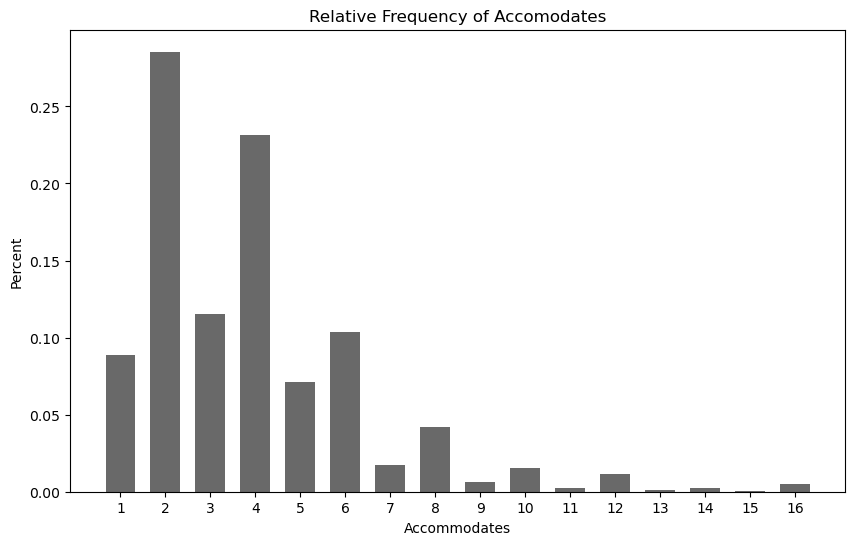

In [154]:
counts = tempDF["accommodates"].value_counts().sort_index()
proportions = tempDF["accommodates"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Accommodates")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Accomodates")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

## Bathrooms_text

Bathrooms_text corresponds to the number of bathrooms in an Airbnb listing. Some listings give specific details on whether or not the bathrooms are shared or are private. Domain knowledge would lead us to believe that more bathrooms would positively affect the price of a listing as well as the bathrooms being private. As opposed to being shared which would lead the price to be less or if there are lesser bathrooms.

In [120]:
tempDF = airbnbDF
tempDF["bathrooms_text"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['bathrooms_text'], inplace=True)

In [121]:
tempDF["bathrooms_text"].describe()

count       5549
unique        27
top       1 bath
freq        3189
Name: bathrooms_text, dtype: object

In [127]:
pd.DataFrame(tempDF["bathrooms_text"].value_counts())

,bathrooms_text
1 bath,2762
2 baths,553
1 shared bath,350
2.5 baths,304
1 private bath,277
1.5 baths,266
3.5 baths,121
1.5 shared baths,101
3 baths,100
2 shared baths,71


Overall, most listings have only 1 bathroom while the next most have only 2 bathrooms. The third most listings have 1 shared bath followed by listings with 2.5 baths. There are outlier values such as 11 shared baths, 0 baths, and 15 baths in an Airbnb listing. 

## Bedrooms

bedrooms is a numerical variable that corresponds to the number of bedrooms in an airbnb listing. It is a key feature of an Airbnb and based on our domain knowledge would suggest that it significant affects the price of it. With more bedrooms, the price of the Airbnb listing would increase.

In [122]:
tempDF = airbnbDF
tempDF["bedrooms"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['bedrooms'], inplace=True)

In [123]:
tempDF["bedrooms"].describe()

count    5097.000000
mean        1.639200
std         1.031441
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: bedrooms, dtype: float64

When we look at the descriptive statistics of number of bedrooms in an Airbnb listing, the first thing we notice is that the extreme maximum value of 15 bedrooms is much more extreme than most of the distribution of bedrooms. Each Airbnb has at least 1 bedroom but the majority of listings in the Airbnb data contain only 1 to 2 bedrooms, given that the 75% quartile is 2 bedrooms. The mean number of bedrooms is 1.65 and the median is one bedroom. 

In [124]:
tempDF["bedrooms"].value_counts().sort_index()

1.0     3161
2.0     1122
3.0      479
4.0      218
5.0       84
6.0       22
7.0        7
8.0        2
9.0        1
15.0       1
Name: bedrooms, dtype: int64

Taking a look at the value counts, only one listing has 15 bedrooms while 1 listing has 9 bedrooms. A majority of listings have 1 and 2 bedrooms which correspond to the descriptive statistics. Additionally, there are a sizeable number of Airbnb listings with 3-5 bedrooms with 429, 218 and 84 listings respectively with these number of bedrooms. 

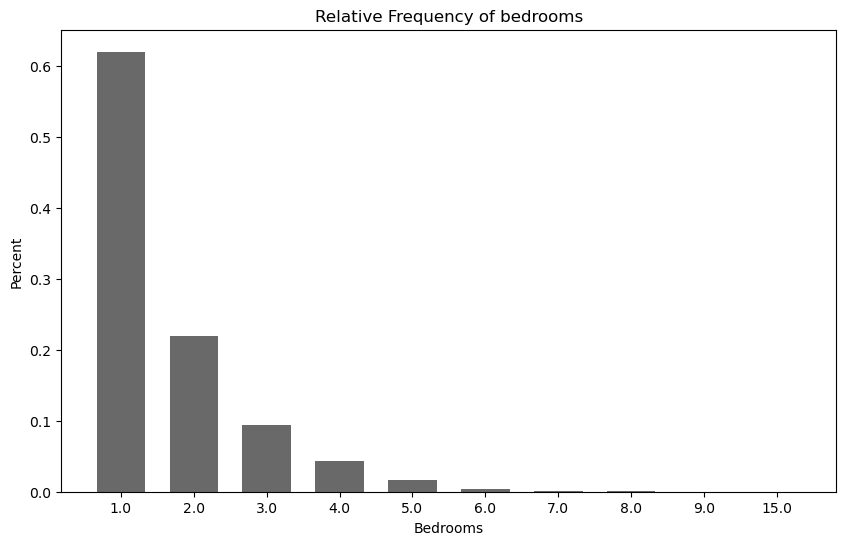

In [125]:
counts = tempDF["bedrooms"].value_counts().sort_index()
proportions = tempDF["bedrooms"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Bedrooms")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of bedrooms")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

## Beds

In [128]:
tempDF = airbnbDF
tempDF["beds"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['beds'], inplace=True)

In [129]:
tempDF["beds"].describe()

count    5051.000000
mean        2.114829
std         1.461953
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: beds, dtype: float64

In [130]:
tempDF["beds"].value_counts().sort_index()

1.0     2142
2.0     1560
3.0      708
4.0      306
5.0      138
6.0      113
7.0       31
8.0       30
9.0        8
10.0       6
11.0       1
12.0       7
20.0       1
Name: beds, dtype: int64

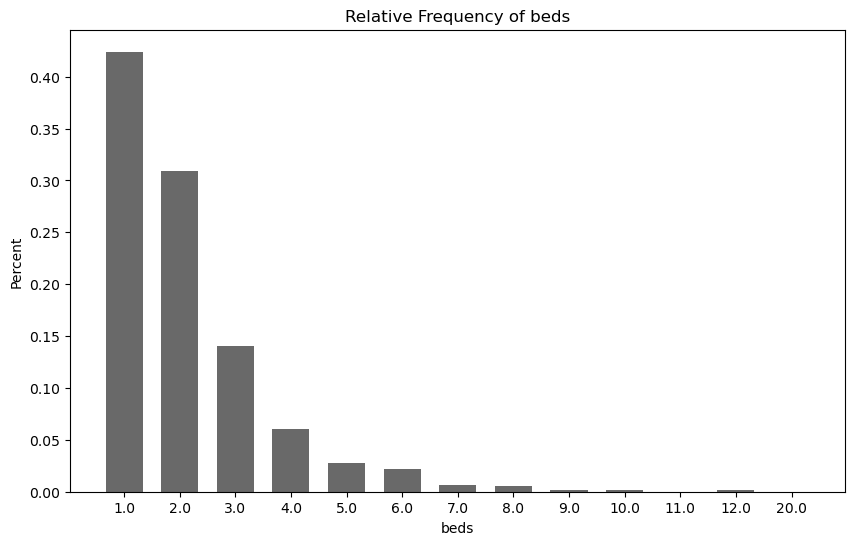

In [131]:
counts = tempDF["beds"].value_counts().sort_index()
proportions = tempDF["beds"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("beds")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of beds")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

## Amenities

In [132]:
tempDF = airbnbDF
tempDF["amenities"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['amenities'], inplace=True)

In [133]:
tempDF["amenities"].describe()

count                                                  5051
unique                                                 4510
top       ["Bathtub", "Coffee", "Pool", "Paid parking of...
freq                                                     90
Name: amenities, dtype: object

In [136]:
pd.DataFrame(tempDF["amenities"].value_counts())

,amenities
"[""Bathtub"", ""Coffee"", ""Pool"", ""Paid parking off premises"", ""Ethernet connection"", ""Air conditioning"", ""Baking sheet"", ""Long term stays allowed"", ""TV"", ""Carbon monoxide alarm"", ""Elevator"", ""Clothing storage"", ""Toaster"", ""Bed linens"", ""Smoke alarm"", ""Crib - available upon request"", ""Microwave"", ""Shampoo"", ""Hair dryer"", ""Pets allowed"", ""Shower gel"", ""Cooking basics"", ""Dishwasher"", ""Conditioner"", ""Outdoor furniture"", ""Extra pillows and blankets"", ""Refrigerator"", ""Cleaning products"", ""Hot water"", ""Oven"", ""Blender"", ""Body soap"", ""Hangers"", ""Dishes and silverware"", ""Freezer"", ""Heating"", ""Smart lock"", ""Washer"", ""Coffee maker"", ""Dining table"", ""Essentials"", ""Kitchen"", ""Exercise equipment"", ""Window guards"", ""Wifi"", ""Dryer"", ""Iron"", ""Wine glasses"", ""Self check-in"", ""Stove"", ""Hot water kettle"", ""Gym""]",90
"[""Air conditioning"", ""Paid parking on premises"", ""Carbon monoxide alarm"", ""Bed linens"", ""Smoke alarm"", ""Microwave"", ""Shampoo"", ""Hair dryer"", ""Pets allowed"", ""First aid kit"", ""TV with standard cable"", ""Extra pillows and blankets"", ""Dedicated workspace"", ""Hot water"", ""Hangers"", ""Heating"", ""Luggage dropoff allowed"", ""Fire extinguisher"", ""Essentials"", ""Building staff"", ""Wifi"", ""Iron"", ""Self check-in"", ""Gym""]",42
"[""Air conditioning"", ""Private entrance"", ""Carbon monoxide alarm"", ""Bed linens"", ""Smoke alarm"", ""Shampoo"", ""Hair dryer"", ""First aid kit"", ""TV with standard cable"", ""Extra pillows and blankets"", ""Hot water"", ""Hangers"", ""Heating"", ""Washer"", ""Coffee maker"", ""Luggage dropoff allowed"", ""Fire extinguisher"", ""Essentials"", ""Building staff"", ""Wifi"", ""Dryer"", ""Iron"", ""Self check-in"", ""Gym""]",21
"[""Air conditioning"", ""Long term stays allowed"", ""Carbon monoxide alarm"", ""Room-darkening shades"", ""Bed linens"", ""Smoke alarm"", ""Microwave"", ""Shampoo"", ""Hair dryer"", ""First aid kit"", ""Cooking basics"", ""Keypad"", ""Refrigerator"", ""Oven"", ""Hangers"", ""Dishes and silverware"", ""Heating"", ""Fire extinguisher"", ""Essentials"", ""Kitchen"", ""Wifi"", ""Breakfast"", ""Iron"", ""Self check-in"", ""Stove""]",19
"[""Bathtub"", ""Air conditioning"", ""Private entrance"", ""Long term stays allowed"", ""TV"", ""Carbon monoxide alarm"", ""Elevator"", ""Dryer \u2013\u00a0In unit"", ""Bed linens"", ""Smoke alarm"", ""Microwave"", ""Shampoo"", ""Hair dryer"", ""Pets allowed"", ""Dishwasher"", ""Refrigerator"", ""Hot water"", ""Oven"", ""Hangers"", ""Lockbox"", ""Heating"", ""Coffee maker"", ""Washer \u2013\u00a0In unit"", ""Essentials"", ""Kitchen"", ""Wifi"", ""Iron"", ""Self check-in"", ""Gym""]",17
...,...
"[""Single level home"", ""Air conditioning"", ""Private entrance"", ""TV"", ""Carbon monoxide alarm"", ""Smoke alarm"", ""Free street parking"", ""Microwave"", ""Shampoo"", ""Hair dryer"", ""First aid kit"", ""Cooking basics"", ""Dishwasher"", ""Extra pillows and blankets"", ""Refrigerator"", ""Hot water"", ""Oven"", ""Free parking on premises"", ""Hangers"", ""Dishes and silverware"", ""Heating"", ""Smart lock"", ""Washer"", ""Coffee maker"", ""Backyard"", ""Luggage dropoff allowed"", ""Fire extinguisher"", ""Essentials"", ""Kitchen"", ""Wifi"", ""Dryer"", ""Iron"", ""Self check-in"", ""Stove""]",1
"[""Hangers"", ""Cooking basics"", ""Essentials"", ""Breakfast"", ""Hair dryer"", ""Kitchen"", ""Bed linens"", ""Oven"", ""Washer"", ""Private entrance"", ""Iron"", ""Smart lock"", ""Coffee maker"", ""Lock on bedroom door"", ""Dishes and silverware"", ""Wifi"", ""Outdoor furniture"", ""First aid kit"", ""Dishwasher"", ""Extra pillows and blankets"", ""Smoke alarm"", ""Air conditioning"", ""Refrigerator"", ""Heating"", ""Dryer"", ""Stove"", ""Free street parking"", ""Microwave"", ""Hot water"", ""Long term stays allowed"", ""Shampoo"", ""Fire extinguisher"", ""Carbon monoxide alarm""]",1
"[""Paid parking off premises"", ""Ethernet

## Minimum_minimum_nights

In [140]:
tempDF = airbnbDF
tempDF["minimum_minimum_nights"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['minimum_minimum_nights'], inplace=True)

In [142]:
tempDF["minimum_minimum_nights"].describe()

count    5051.000000
mean       21.703623
std        48.325270
min         1.000000
25%         2.000000
50%         3.000000
75%        31.000000
max      1125.000000
Name: minimum_minimum_nights, dtype: float64

In [144]:
tempDF["minimum_minimum_nights"].value_counts().sort_index()

1       1155
2       1084
3        391
4         99
5         57
6         11
7         62
8          4
9          1
10        12
12         1
13         3
14        28
15         7
16         1
17         1
20         1
21         7
22         1
25         5
27         1
28        31
29         2
30        71
31      1492
32       216
33         2
35         2
40         2
42         1
45         4
48         1
50         3
55         1
56         1
60        47
65         1
70        10
75         1
77         2
80         1
87         1
89         2
90        40
91        84
110        1
120        5
135        1
150        3
180       20
181        1
183        1
184        4
185        1
200        1
360       48
365       12
600        1
730        1
1125       1
Name: minimum_minimum_nights, dtype: int64

## Maximum_minimum_nights

In [146]:
tempDF = airbnbDF
tempDF["maximum_minimum_nights"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['maximum_minimum_nights'], inplace=True)

In [147]:
tempDF["maximum_minimum_nights"].describe()

count    5051.000000
mean       38.908929
std        95.998420
min         1.000000
25%         2.000000
50%         5.000000
75%        31.000000
max      1125.000000
Name: maximum_minimum_nights, dtype: float64

In [148]:
tempDF["maximum_minimum_nights"].value_counts().sort_index()

1       600
2       965
3       610
4       301
5       112
       ... 
365      18
366     158
600       1
730      34
1125      1
Name: maximum_minimum_nights, Length: 63, dtype: int64

## Minimum_maximum_nights

In [151]:
tempDF = airbnbDF
tempDF["minimum_maximum_nights"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['minimum_maximum_nights'], inplace=True)

In [152]:
tempDF["minimum_maximum_nights"].describe()

count    5.051000e+03
mean     2.795788e+03
std      1.406949e+05
min      1.000000e+00
25%      3.650000e+02
50%      1.125000e+03
75%      1.125000e+03
max      9.999999e+06
Name: minimum_maximum_nights, dtype: float64

In [153]:
tempDF["minimum_maximum_nights"].value_counts().sort_index()

1           154
2            15
3            13
4             4
5            53
           ... 
1125       3358
1825          1
3365          1
10000         1
9999999       1
Name: minimum_maximum_nights, Length: 111, dtype: int64

## Maximum_maximum_nights

## Pairwise Variable EDA

## Neighbourhood_cleansed vs. price

## Accommodates vs. price

## Bathrooms_text vs. price

## Bedrooms vs. price

## Beds vs. price

## Amenities vs. price